In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\Balenciaga_Twitter.csv")
data.head(25)

,id,content,date
0,1.620210e+18,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h,2023-01-30 23:46:10+00:00
1,1.620210e+18,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP",2023-01-30 23:44:31+00:00
2,1.620200e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C,2023-01-30 23:33:43+00:00
3,1.620150e+18,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®,2023-01-30 20:04:35+00:00
4,1.620140e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4,2023-01-30 19:30:19+00:00
5,1.620130e+18,WTF? Why is this happening??? #Balenciaga https://t.co/tJLYkONwP2,2023-01-30 18:51:52+00:00
6,1.620130e+18,So good I had to share! Check out all the items I'm loving on @Poshmarkapp from @kmullen1019 #poshmark #fashion #style #shopmycloset #balenciaga #freepeople #dannynicole: https://t.co/kBUmpEcdc4 https://t.co/p3n0TDQp5Y,2023-01-30 18:29:23+00:00
7,1.620120e+18,LETS TALK ABOUT BALENCIAGA ðŸ’€ #shorts #makeup #balenciaga https://t.co/mlTDFCx0Z3 via @YouTube,2023-01-30 17:51:43+00:00
8,1.620120e+18,Sadly it's much bigger than #Balenciaga #BalenciagaGate gotta start somewhere,2023-01-30 17:48:02+00:00
9,1.620120e+18,@skims All the bot replies should tell you something....we don't support pedos and the abuse of children. You dress your OWN CHILD in a GIMP mask and call it fashion. You're sick and satanic. #balenciaga #cancelskims #cancelkimkardashian ðŸ¤®ðŸ¤®ðŸ¤®ðŸ¤®ð,2023-01-30 17:42:35+00:00


In [3]:
data.shape

(29161, 3)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'content':'Comments'}, inplace = True)
# removing columns

data = data.drop(['id','date'], axis=1)
data = data[['Comments']][:4000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,Latest Podcast is out now! - Balenciaga Is Run By Satanists | JUST THINK #5 https://t.co/AsIzLXynLn via @YouTube | #Balenciagapedos #Balenciaga #satan #satanist #SATANIC #pedophelia #podcastshow #podcast #podcastlife #PodcastAndChill #podcaster #podcasting #lucifer #luciferian #h
1,"Over 500 brands including #Gucci, #OffWhite, #Balenciaga, #MaisonMargiela, #MarineSerre, #SaintLaurent #fashion and many more https://t.co/gRmQa9ahMX https://t.co/7TMOC7LXRP"
2,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #balenciaga #variety #stevemadden: https://t.co/C6QmuJvQSc https://t.co/08QcAOwm2C
3,@SKKN NOTHING! We don't support pedos and those who support child abuse and exploitation. #balenciaga #cancelkimkardashian #cancelskims ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®ðŸ’©ðŸ¤®
4,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #madewell #balenciaga #kaileigh: https://t.co/H1v5xqQaEo https://t.co/r3oAOFBei4


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(4000, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                              [latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]
1                                                                                                                                      [500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa9ahmx, httpstco7tmoc7lxrp]
2                                                                                                                       [good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc6qmujvqsc, httpstco08qcaowm2c]
3                                                                                                                                          

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]"
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]"
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]"
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]"
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 2544
negative tweets: 1456


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000,1
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000,1
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402,1
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266,0
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402,1


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000,1,Positive
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000,1,Positive
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402,1,Positive
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266,0,Negative
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402,1,Positive


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

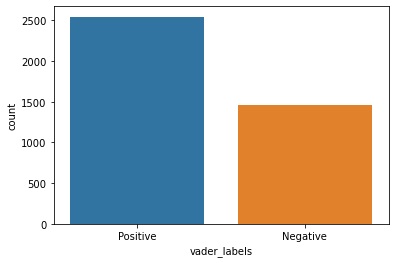

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


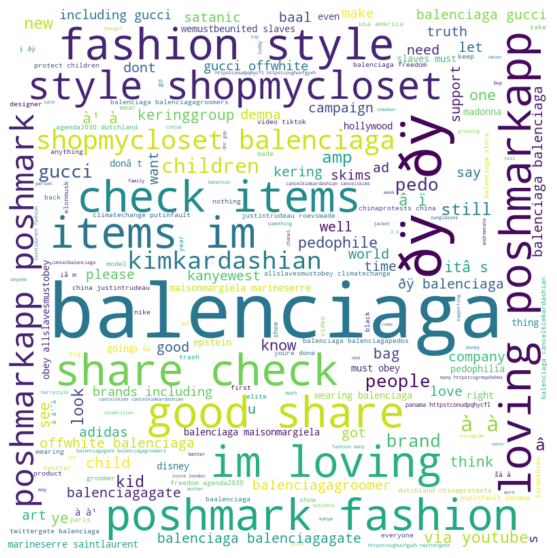

Negative Sentiments


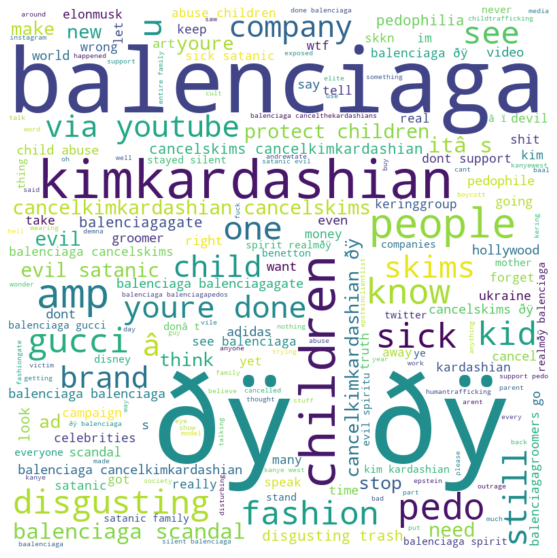

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                                                                                                        Comments  \
0                          latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h   
1                                                                                                                      500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp   
2                                                                                                          good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden h

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000,1,Positive,0.065701,0.860987
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000,1,Positive,0.033378,0.870209
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402,1,Positive,0.001665,0.025601
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266,0,Negative,0.939567,0.057508
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402,1,Positive,0.001665,0.026005
5,wtf happening balenciaga httpstcotjlykonwp2,"[wtf, happening, balenciaga, httpstcotjlykonwp, 2]","[(wtf, NN), (happening, VBG), (balenciaga, NN), (httpstcotjlykonwp2, NN)]",-0.5859,0,Negative,0.245694,0.721203
6,good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole httpstcokbumpecdc4 httpstcop3n0tdqp5y,"[good, share, check, items, im, loving, poshmarkapp, kmullen, 1019, poshmark, fashion, style, shopmycloset, balenciaga, freepeople, d

In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000,1,Positive,0.065701,0.860987,Positive
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000,1,Positive,0.033378,0.870209,Positive
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402,1,Positive,0.001665,0.025601,Negative
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266,0,Negative,0.939567,0.057508,Negative
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402,1,Positive,0.001665,0.026005,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

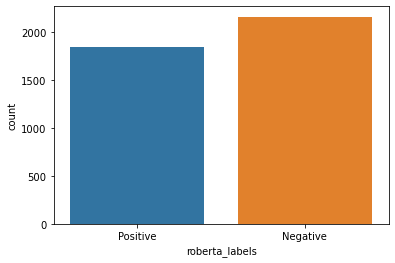

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


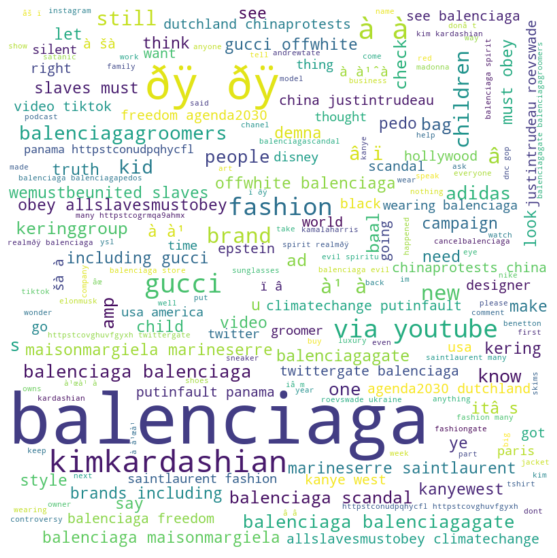

Negative Sentiments


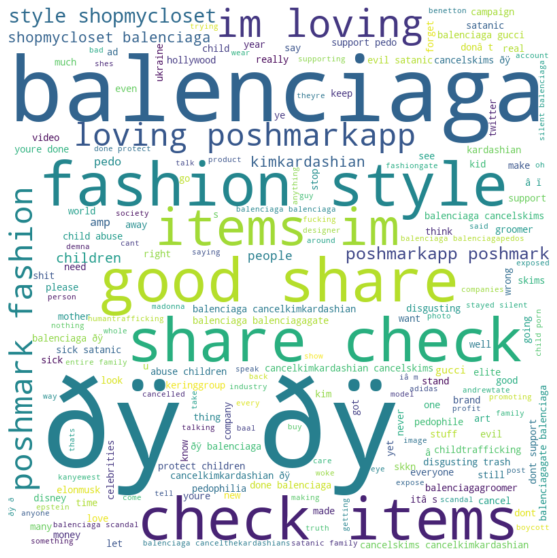

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h', '500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp', 'good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c', 'skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’', '©ðÿ¤®ðÿ’', '©ðÿ¤®', 'good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4', 'wtf happening balenciaga httpstcotjlykonwp2', 'good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole ht

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'NEGATIVE', 'score': 0.9716696739196777},
 {'label': 'NEGATIVE', 'score': 0.9429764151573181},
 {'label': 'POSITIVE', 'score': 0.9840506911277771},
 {'label': 'NEGATIVE', 'score': 0.9953526258468628},
 {'label': 'POSITIVE', 'score': 0.9637047052383423},
 {'label': 'NEGATIVE', 'score': 0.9365926384925842},
 {'label': 'POSITIVE', 'score': 0.9759169220924377},
 {'label': 'NEGATIVE', 'score': 0.9742059707641602},
 {'label': 'NEGATIVE', 'score': 0.9973368048667908},
 {'label': 'NEGATIVE', 'score': 0.9971486926078796},
 {'label': 'POSITIVE', 'score': 0.987447202205658},
 {'label': 'POSITIVE', 'score': 0.97762531042099},
 {'label': 'NEGATIVE', 'score': 0.9692933559417725},
 {'label': 'POSITIVE', 'score': 0.9580766558647156},
 {'label': 'POSITIVE', 'score': 0.9875680208206177},
 {'label': 'POSITIVE', 'score': 0.967322826385498},
 {'label': 'NEGATIVE', 'score': 0.9875081181526184},
 {'label': 'NEGATIVE', 'score': 0.9920650124549866},
 {'label': 'POSITIVE', 'score': 0.9581639766693115

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,"[latest, podcast, balenciaga, run, satanists, think, 5, httpstcoasizlxynln, via, youtube, balenciagapedos, balenciaga, satan, satanist, satanic, pedophelia, podcastshow, podcast, podcastlife, podcastandchill, podcaster, podcasting, lucifer, luciferian, h]","[(latest, JJS), (podcast, NN), (balenciaga, NN), (run, VBP), (satanists, NNS), (think, VBP), (5, CD), (httpstcoasizlxynln, NN), (via, IN), (youtube, NN), (balenciagapedos, NN), (balenciaga, NN), (satan, JJ), (satanist, NN), (satanic, JJ), (pedophelia, NN), (podcastshow, NN), (podcast, JJ), (podcastlife, NN), (podcastandchill, NN), (podcaster, NN), (podcasting, VBG), (lucifer, NN), (luciferian, JJ), (h, NN)]",0.0000,1,Positive,0.065701,0.860987,Positive,0.971670,Negative
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,"[500, brands, including, gucci, offwhite, balenciaga, maisonmargiela, marineserre, saintlaurent, fashion, many, httpstcogrmqa, 9ahmx, httpstco, 7tmoc7lxrp]","[(500, CD), (brands, NNS), (including, VBG), (gucci, JJ), (offwhite, JJ), (balenciaga, NN), (maisonmargiela, NN), (marineserre, JJ), (saintlaurent, JJ), (fashion, NN), (many, JJ), (httpstcogrmqa9ahmx, NN), (httpstco7tmoc7lxrp, NN)]",0.0000,1,Positive,0.033378,0.870209,Positive,0.942976,Negative
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, balenciaga, variety, stevemadden, httpstcoc, 6qmujvqsc, httpstco, 08qcaowm2c]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (balenciaga, NN), (variety, NN), (stevemadden, JJ), (httpstcoc6qmujvqsc, NN), (httpstco08qcaowm2c, NN)]",0.8402,1,Positive,0.001665,0.025601,Negative,0.984051,Positive
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,"[skkn, nothing, dont, support, pedos, support, child, abuse, exploitation, balenciaga, cancelkimkardashian, cancelskims, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®, ðÿ, ’, ©, ðÿ, ¤, ®]","[(skkn, NN), (nothing, NN), (dont, JJ), (support, NN), (pedos, VBD), (support, NN), (child, NN), (abuse, IN), (exploitation, NN), (balenciaga, NN), (cancelkimkardashian, JJ), (cancelskims, NNS), (ðÿ, VBP), (’, JJ), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®ðÿ, NNP), (’, NNP), (©ðÿ¤®, NN)]",-0.3266,0,Negative,0.939567,0.057508,Negative,0.995353,Negative
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,"[good, share, check, items, im, loving, poshmarkapp, poshmark, fashion, style, shopmycloset, madewell, balenciaga, kaileigh, httpstcoh, 1v5xqqaeo, httpstcor, 3oaofbei4]","[(good, JJ), (share, NN), (check, VB), (items, NNS), (im, JJ), (loving, VBG), (poshmarkapp, NN), (poshmark, NN), (fashion, NN), (style, NN), (shopmycloset, NN), (madewell, NN), (balenciaga, RB), (kaileigh, JJ), (httpstcoh1v5xqqaeo, NN), (httpstcor3oaofbei4, NN)]",0.8402,1,Positive,0.001665,0.026005,Negative,0.963705,Positive
5,wtf happening balenciaga httpstcotjlykonwp2,"[wtf, happening, balenciaga, httpstcotjlykonwp, 2]","[(wtf, NN), (happening, VBG), (balenciaga, NN), (httpstcotjlykonwp2, NN)]",-0.5859,0,Negative,0.245694,0.721203,Positive,0.936593,Negative
6,good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopm

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

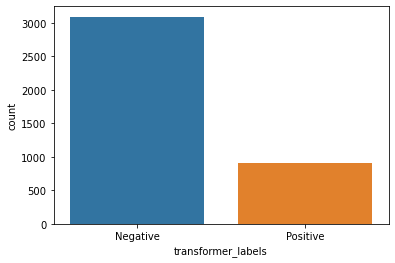

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


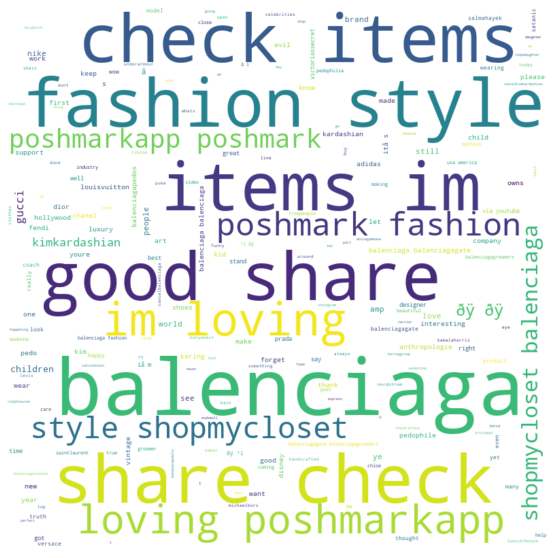

Negative Sentiments


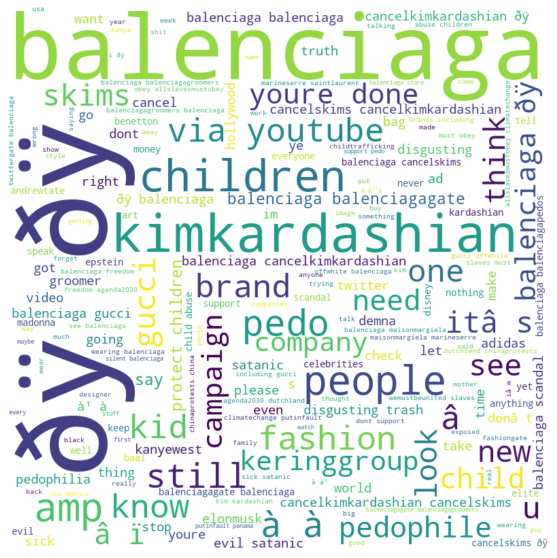

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,latest podcast balenciaga run satanists think 5 httpstcoasizlxynln via youtube balenciagapedos balenciaga satan satanist satanic pedophelia podcastshow podcast podcastlife podcastandchill podcaster podcasting lucifer luciferian h,Positive,Positive,Negative
1,500 brands including gucci offwhite balenciaga maisonmargiela marineserre saintlaurent fashion many httpstcogrmqa9ahmx httpstco7tmoc7lxrp,Positive,Positive,Negative
2,good share check items im loving poshmarkapp poshmark fashion style shopmycloset balenciaga variety stevemadden httpstcoc6qmujvqsc httpstco08qcaowm2c,Positive,Negative,Positive
3,skkn nothing dont support pedos support child abuse exploitation balenciaga cancelkimkardashian cancelskims ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®ðÿ’©ðÿ¤®,Negative,Negative,Negative
4,good share check items im loving poshmarkapp poshmark fashion style shopmycloset madewell balenciaga kaileigh httpstcoh1v5xqqaeo httpstcor3oaofbei4,Positive,Negative,Positive
5,wtf happening balenciaga httpstcotjlykonwp2,Negative,Positive,Negative
6,good share check items im loving poshmarkapp kmullen1019 poshmark fashion style shopmycloset balenciaga freepeople dannynicole httpstcokbumpecdc4 httpstcop3n0tdqp5y,Positive,Negative,Positive
7,lets talk balenciaga ðÿ’€ shorts makeup balenciaga httpstcomltdfcx0z3 via youtube,Positive,Positive,Negative
8,sadly much bigger balenciaga balenciagagate gotta start somewhere,Negative,Negative,Negative
9,skims bot replies tell somethingwe dont support pedos abuse children dress child gimp mask call fashion youre sick satanic balenciaga cancelskims cancelkimkardashian ðÿ¤®ðÿ¤®ðÿ¤®ðÿ¤®ð,Negative,Negative,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [56]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.5677
F1 score for vader_labels: 0.5924
Accuracy for roberta_labels : 0.4572
F1 score for roberta_labels: 0.5010


In [57]:
####comparison of the results of the scores of models through plots

In [58]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

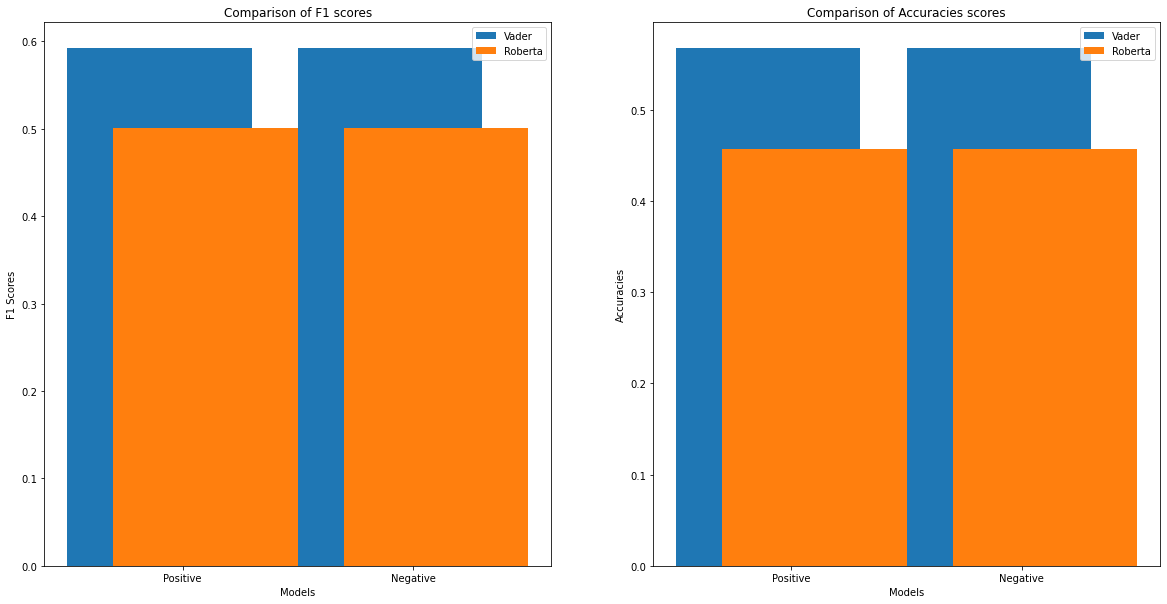

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparison of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparison of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the Vader model has the highest F1 score of 0.5924,outperforming  Roberta's f1 score of 0.5010 , so to conclude , Vader model predicted sentiments much accurately than Roberta model for a dataset of this type and size.


